# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

於啟動期間 - 警告訊息：
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


載入需要的套件：tidyverse


## Load the data

In [5]:
%%R
 
# Import data with R
df <- read_csv('merged_food_access_data.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 152
       GEOID State County Urban Pop2010 Housing_Units GroupQuartersFlag NUMGQTRS
       <dbl> <chr> <chr>  <dbl>   <dbl>         <dbl>             <dbl>    <dbl>
1    3.60e10 New … Alban…     1    2139           784                 0       79
2    3.60e10 New … Alban…     1    6046          2514                 0       84
3    3.60e10 New … Alban…     1    5888          2581                 0      193
4    3.60e10 New … Alban…     1    2227          1017                 0      575
# ℹ 144 more variables: PCTGQTRS <dbl>, Low_Income_1and10 <dbl>,
#   `Low_Income_1/2and10` <dbl>, Low_Income_1and20 <dbl>,
#   Low_Income_Vehicle <dbl>, HUNVFlag <dbl>, LowIncomeTracts <dbl>,
#   PovertyRate <dbl>, MedianFamilyIncome <dbl>, LA1and10 <dbl>,
#   LAhalfand10 <dbl>, LA1and20 <dbl>, LATracts_half <dbl>, LATracts1 <dbl>,
#   LATracts10 <dbl>, LATracts20 <dbl>, LATractsVehicle_20 <dbl>,
#   LAPOP1_10 <dbl>, LAPOP05_10 <dbl>, LAPOP1_20 <dbl>, LALOWI1_10 <dbl>, …
# ℹ Use `colnames(

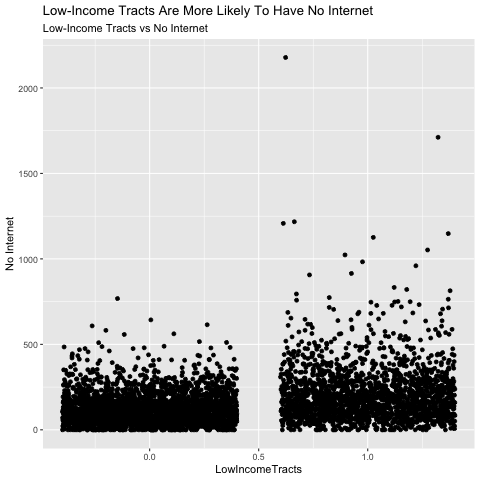

In [6]:
%%R
# try out 
df %>% ggplot() +
  aes(x = LowIncomeTracts, y = `No Internet`) + 
  geom_jitter() + 
  labs( title = "Low-Income Tracts Are More Likely To Have No Internet",
    subtitle = "Low-Income Tracts vs No Internet")


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [40]:
%%R 

# code for summary statistics
summary(df)




     GEOID              State              County              Urban       
 Min.   :3.600e+10   Length:4870        Length:4870        Min.   :0.0000  
 1st Qu.:3.605e+10   Class :character   Class :character   1st Qu.:1.0000  
 Median :3.606e+10   Mode  :character   Mode  :character   Median :1.0000  
 Mean   :3.606e+10                                         Mean   :0.8591  
 3rd Qu.:3.608e+10                                         3rd Qu.:1.0000  
 Max.   :3.612e+10                                         Max.   :1.0000  
                                                                           
    Pop2010      Housing_Units     GroupQuartersFlag    NUMGQTRS      
 Min.   :    1   Min.   :    0.0   Min.   :0.00000   Min.   :    0.0  
 1st Qu.: 2614   1st Qu.:  978.2   1st Qu.:0.00000   1st Qu.:    0.0  
 Median : 3758   Median : 1411.0   Median :0.00000   Median :   10.0  
 Mean   : 3979   Mean   : 1502.6   Mean   :0.01191   Mean   :  120.5  
 3rd Qu.: 5069   3rd Qu.: 1891.8   3r

### Notes about summary statistics:
- some census tracts have almost no residents (min=1)

In [42]:
%%R

discrete_variables <- c('Urban', 'Low_Income_1and10', 'Low_Income_Vehicle', 'Low_Income_1and20')
# 👉 Select the discrete variables only and make a pivot table for each

df %>% 
    select(discrete_variables) %>%
    pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
    group_by(variable, value) %>% 
    summarize(
        count = n()
    )

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.
# A tibble: 8 × 3
# Groups:   variable [4]
  variable           value count
  <chr>              <dbl> <int>
1 Low_Income_1and10      0  4676
2 Low_Income_1and10      1   194
3 Low_Income_1and20      0  4700
4 Low_Income_1and20      1   170
5 Low_Income_Vehicle     0  4477
6 Low_Income_Vehicle     1   393
7 Urban                  0   686
8 Urban                  1  4184


## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 86 rows containing non-finite values (`stat_bin()`). 



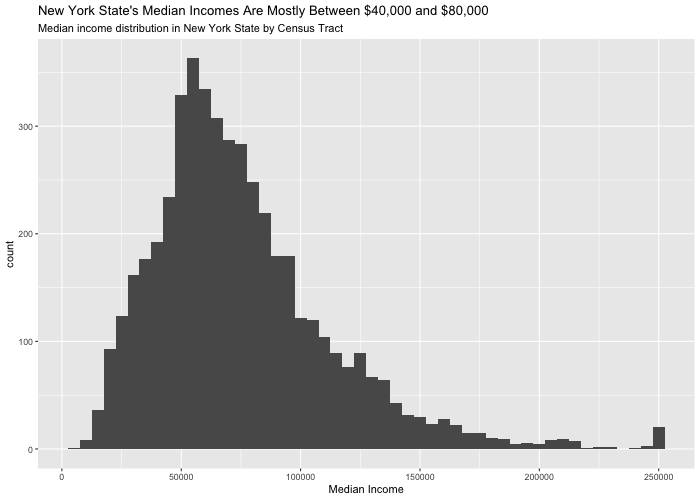

In [9]:
%%R -w 700 -h 500

#plot to see the distribution of "Median Income"
df %>% ggplot() +
  aes(x = `Median Income`) + 
  geom_histogram(binwidth = 5000) + 
  labs(title = "New York State's Median Incomes Are Mostly Between $40,000 and $80,000",
  subtitle = "Median income distribution in New York State by Census Tract")


# make sure to make a meaningful title and subtitle



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 2769 rows containing non-finite values (`stat_bin()`). 



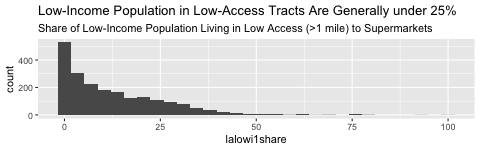

In [10]:
%%R -h 150
# plot a box plot with "lalowi1share"
df %>% ggplot() +
  aes(x = `lalowi1share`) + 
  geom_histogram() + 
  labs(title = "Low-Income Population in Low-Access Tracts Are Generally under 25%",
  subtitle = "Share of Low-Income Population Living in Low Access (>1 mile) to Supermarkets")


# make sure to make a meaningful title and subtitle

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 2769 rows containing non-finite values (`stat_bin()`). 



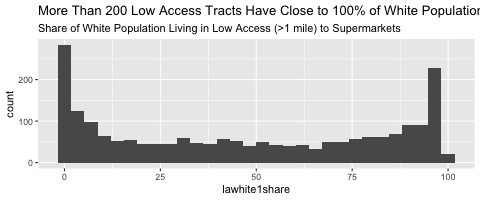

In [113]:
%%R -h 200
# plot two separate box plots with "lawhite1share"
df %>% ggplot() +
  aes(x = `lawhite1share`) + 
  geom_histogram() + 
  labs(title = "More Than 200 Low Access Tracts Have Close to 100% of White Population On Average",
  subtitle = "Share of White Population Living in Low Access (>1 mile) to Supermarkets")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 2769 rows containing non-finite values (`stat_bin()`). 



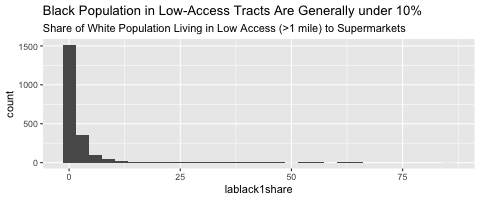

In [12]:
%%R -h 200
# plot two separate box plots with "lawhite1share"
df %>% ggplot() +
  aes(x = `lablack1share`) + 
  geom_histogram() + 
  labs(title = "Black Population in Low-Access Tracts Are Generally under 10%",
  subtitle = "Share of White Population Living in Low Access (>1 mile) to Supermarkets")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


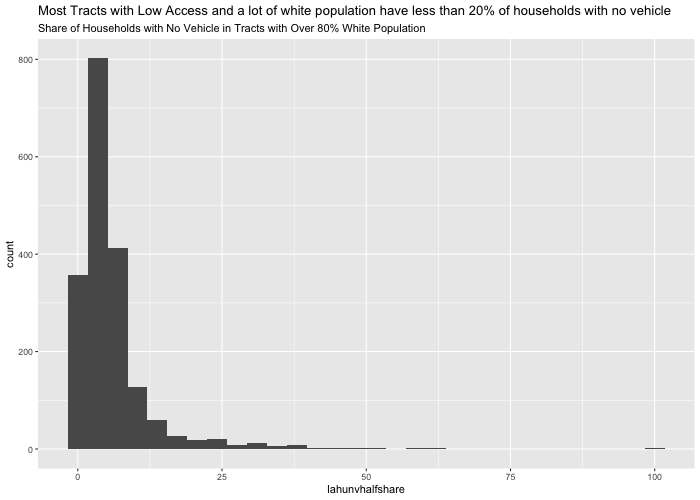

In [19]:
%%R -w 700 -h 500
# find the tracts with "lawhite1share" > 0.8 and return their tract numbers and their "lahunvhalfshare"
df %>% 
    filter(lawhite1share > 0.8) %>%
    # plot the "lahunvhalfshare" for these tracts
    ggplot() +
    aes(x = `lahunvhalfshare`) +
    geom_histogram() +
    labs(title = "Most Tracts with Low Access and a lot of white population have less than 20% of households with no vehicle",
    subtitle = "Share of Households with No Vehicle in Tracts with Over 80% White Population")


### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

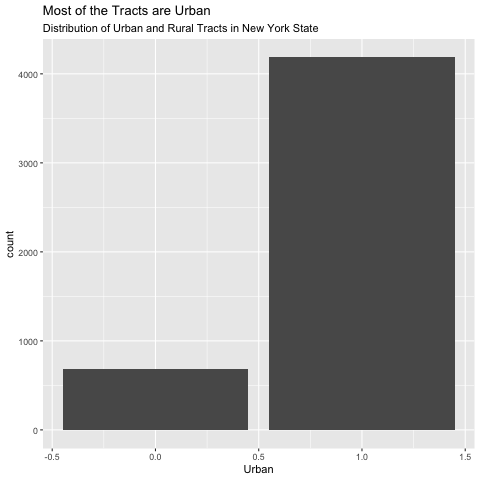

In [120]:
%%R
# plot the distribution of "Urban"
df %>% ggplot() +
  aes(x = Urban) + 
  geom_bar() + 
  labs(title = "Most of the Tracts are Urban",
  subtitle = "Distribution of Urban and Rural Tracts in New York State")

# make sure to make a meaningful title and subtitle

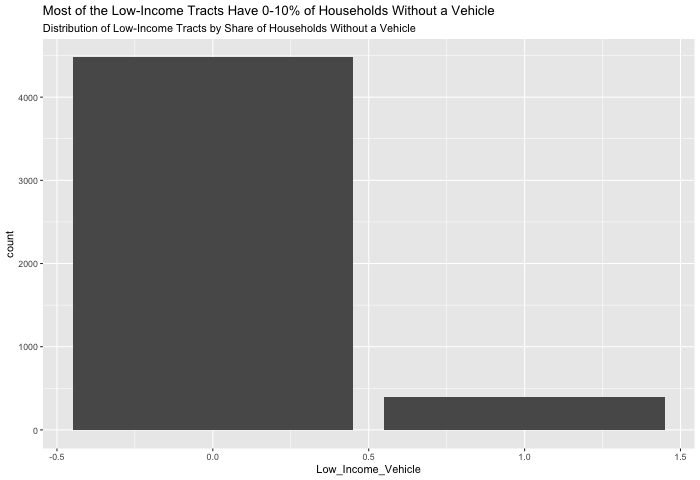

In [127]:
%%R -w 700
# plot the distribution of "Low_Income_Vehicle"
df %>% ggplot() +
  aes(x = Low_Income_Vehicle) + 
  geom_bar() + 
  labs(title = "Most of the Low-Income Tracts Have 0-10% of Households Without a Vehicle",
  subtitle = "Distribution of Low-Income Tracts by Share of Households Without a Vehicle")
# make sure to make a meaningful title and subtitle

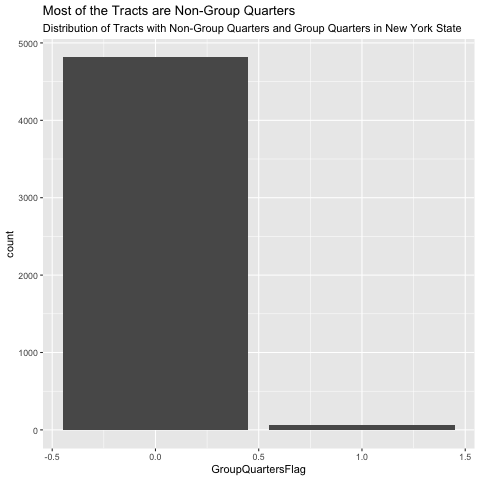

In [126]:
%%R
# plot distribution of "GroupQuartersFlag"
df %>% ggplot() +
  aes(x = GroupQuartersFlag) + 
  geom_bar() + 
  labs(title = "Most of the Tracts are Non-Group Quarters",
  subtitle = "Distribution of Tracts with Non-Group Quarters and Group Quarters in New York State")
# make sure to make a meaningful title and subtitle